This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [5]:
train_data.shape

(25000,)

In [16]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [17]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [19]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [21]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.4992 - accuracy: 0.7887 - val_loss: 0.3834 - val_accuracy: 0.8612
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2988 - accuracy: 0.9036 - val_loss: 0.3095 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2159 - accuracy: 0.9290 - val_loss: 0.3147 - val_accuracy: 0.8710
Epoch 4/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1707 - accuracy: 0.9442 - val_loss: 0.2761 - val_accuracy: 0.8920
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1395 - accuracy: 0.9540 - val_loss: 0.2808 - val_accuracy: 0.8905
Epoch 6/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1127 - accuracy: 0.9658 - val_loss: 0.3226 - val_accuracy: 0.8798
Epoch 7/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0940 - accuracy: 0.9717 - val_loss: 0.3323 - val_accuracy: 0.8801
Epoch 8/20
30

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

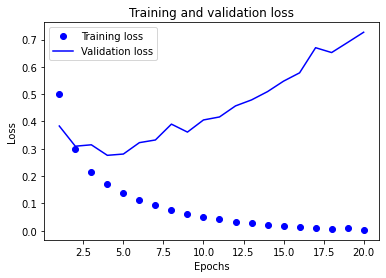

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

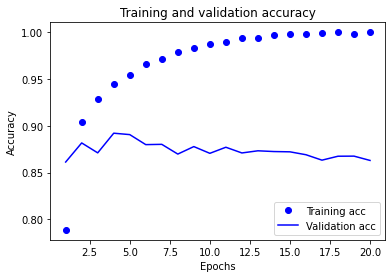

In [26]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [27]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 40ms/step - loss: 0.4647 - accuracy: 0.8088
Epoch 2/4
49/49 [==============================] - 2s 40ms/step - loss: 0.2640 - accuracy: 0.9080
Epoch 3/4
49/49 [==============================] - 2s 40ms/step - loss: 0.2043 - accuracy: 0.9283
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2958 - accuracy: 0.8839


In [28]:
results

[0.2958313226699829, 0.8838800191879272]

### Using a trained model to generate predictions on new data

In [29]:
model.predict(x_test)

array([[0.15969825],
       [0.99916404],
       [0.77416694],
       ...,
       [0.1336745 ],
       [0.07547402],
       [0.4353899 ]], dtype=float32)

## Exercise 1 - Further experiments

* You used two representation layers before the final classification layer. Try using one or three representation layers, and see how doing so affects validation and test accuracy.
* Try using layers with more units or fewer units: 32 units, 64 units, and so on.
* Try using the `mse` loss function instead of `binary_crossentropy`.
* Try using the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.

### Wrapping up

Here’s what you should take away from this example:

* You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options too.
* Stacks of Dense layers with `relu` activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.
* In a binary classification problem (two output classes), your model should end with a `Dense` layer with one unit and a `sigmoid` activation: the output of your model should be a scalar between 0 and 1, encoding a probability.
* With such a scalar `sigmoid` output on a binary classification problem, the loss function you should use is `binary_crossentropy`.
* The `rmsprop` optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.
* As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [30]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [31]:
len(train_data)

8982

In [32]:
len(test_data)

2246

In [33]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [44]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [45]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [46]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [47]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [48]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [49]:
# built-in way in Keras
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [50]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Building your model

**Model definition**

In [51]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [52]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [53]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [54]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 70ms/step - loss: 2.7373 - accuracy: 0.5232 - val_loss: 1.8045 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.4727 - accuracy: 0.7070 - val_loss: 1.3218 - val_accuracy: 0.7280
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.0727 - accuracy: 0.7757 - val_loss: 1.1415 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8372 - accuracy: 0.8262 - val_loss: 1.0354 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 1s 56ms/step - loss: 0.6649 - accuracy: 0.8648 - val_loss: 0.9785 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.5360 - accuracy: 0.8906 - val_loss: 0.9478 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 52ms/step - loss: 0.4306 - accuracy: 0.9119 - val_loss: 0.9324 - val_accuracy: 0.8060
Epoch 8/20
16

**Plotting the training and validation loss**

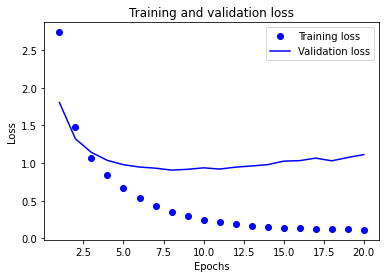

In [55]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

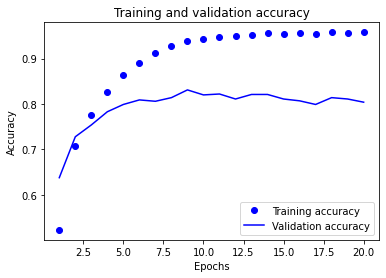

In [56]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [57]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 48ms/step - loss: 2.5641 - accuracy: 0.5478
Epoch 2/9
18/18 [==============================] - 1s 48ms/step - loss: 1.3323 - accuracy: 0.7182
Epoch 3/9
18/18 [==============================] - 1s 47ms/step - loss: 0.9682 - accuracy: 0.7967
Epoch 4/9
18/18 [==============================] - 1s 49ms/step - loss: 0.7584 - accuracy: 0.8369
Epoch 5/9
18/18 [==============================] - 1s 49ms/step - loss: 0.5977 - accuracy: 0.8723
Epoch 6/9
18/18 [==============================] - 1s 48ms/step - loss: 0.4733 - accuracy: 0.8985
Epoch 7/9
18/18 [==============================] - 1s 48ms/step - loss: 0.3818 - accuracy: 0.9188
Epoch 8/9
18/18 [==============================] - 1s 47ms/step - loss: 0.3148 - accuracy: 0.9319
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9548 - accuracy: 0.7881


In [58]:
results

[0.9547521471977234, 0.7880676984786987]

In [59]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19590382902938558

### Generating predictions on new data

In [60]:
predictions = model.predict(x_test)

In [61]:
predictions[0].shape

(46,)

In [62]:
np.sum(predictions[0])

1.0000001

In [63]:
np.argmax(predictions[0])

4

### A different way to handle the labels and the loss

In [64]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [65]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [66]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 3.2625 - accuracy: 0.1750 - val_loss: 2.7481 - val_accuracy: 0.3830
Epoch 2/20
63/63 [==============================] - 1s 19ms/step - loss: 2.2068 - accuracy: 0.4555 - val_loss: 1.9747 - val_accuracy: 0.4570
Epoch 3/20
63/63 [==============================] - 1s 19ms/step - loss: 1.5995 - accuracy: 0.5961 - val_loss: 1.6116 - val_accuracy: 0.5900
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 1.3402 - accuracy: 0.6275 - val_loss: 1.5237 - val_accuracy: 0.6170
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 1.2074 - accuracy: 0.6739 - val_loss: 1.4805 - val_accuracy: 0.6530
Epoch 6/20
63/63 [==============================] - 1s 21ms/step - loss: 1.1116 - accuracy: 0.7169 - val_loss: 1.4657 - val_accuracy: 0.6720
Epoch 7/20
63/63 [==============================] - 1s 23ms/step - loss: 1.0376 - accuracy: 0.7345 - val_loss: 1.4671 - val_accuracy: 0.6870
Epoch 8/20
63

## Exercise 2 - Further experiments
* Try using larger or smaller layers: 32 units, 128 units, and so on.
* You used two intermediate layers before the final softmax classification layer. Now try using a single intermediate layer, or three intermediate layers.

### Wrapping up
* If you’re trying to classify data points among `N` classes, your model should end with a Dense layer of size `N`.
* In a single-label, multiclass classification problem, your model should end with a `softmax` activation so that it will output a probability distribution over the `N` output classes.
* Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the model and the true distribution of the targets.
* There are two ways to handle labels in multiclass classification:
    - Encoding the labels via categorical encoding (also known as **one-hot encoding**) and using `categorical_crossentropy` as a loss function
    - Encoding the labels as integers and using the `parse_categorical_crossentropy` loss function
* If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your model due to intermediate layers that are too small.

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [67]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [68]:
train_data.shape

(404, 13)

In [69]:
test_data.shape

(102, 13)

In [71]:
train_targets[0]

15.2

### Preparing the data

**Normalizing the data**

In [72]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [73]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [74]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [75]:
all_scores

[1.8875958919525146, 2.7264182567596436, 2.5249829292297363, 2.346205711364746]

In [76]:
np.mean(all_scores)

2.37130069732666

**Saving the validation logs at each fold**

In [77]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [78]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

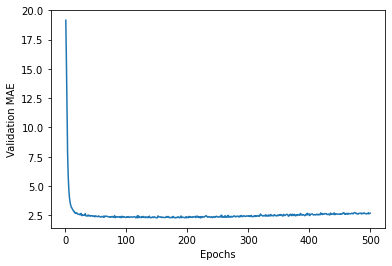

In [79]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

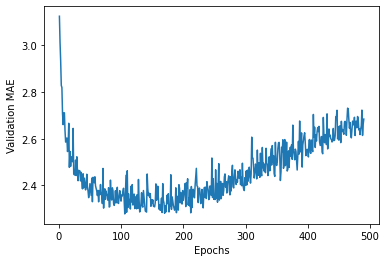

In [80]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [81]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 15.3450 - mae: 2.5615


In [82]:
test_mae_score

2.561462163925171

### Generating predictions on new data

In [83]:
predictions = model.predict(test_data)
predictions[0]

array([9.163576], dtype=float32)

### Wrapping up
* Regression is done using different loss functions than we used for classification. Mean squared error (MSE) is a loss function commonly used for regression.
* Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error (MAE).
* When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
* When there is little data available, using K-fold validation is a great way to reliably evaluate a model.
* When little training data is available, it’s preferable to use a small model with few intermediate layers (typically only one or two), in order to avoid severe overfitting.

## Summary
* The three most common kinds of machine learning tasks on vector data are binary classification, multiclass classification, and scalar regression.
* When your data has features with different ranges, scale each feature independently as part of preprocessing.
* As training progresses, neural networks eventually begin to overfit and obtain worse results on never-before-seen data.
* If you don’t have much training data, use a small model with only one or two intermediate layers, to avoid severe overfitting.
* If your data is divided into many categories, you may cause information bottlenecks if you make the intermediate layers too small.
* When you’re working with little data, K-fold validation can help reliably evaluate your model.